<a href="https://colab.research.google.com/github/SK-Mirnezami/Credit-Default/blob/main/Credit_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. **Preprocessing**

### 1.1 **Loading The Data**

#### 1.1.1 Importing The Libraries

In [ ]:
import numpy as np
import pandas as pd

#### 1.1.2 Loading The Dataset

In [ ]:
file_path = "D:\Mini Projects\Credit Card\Credit Default\Credit_Default_Py.xlsx"
dataset = pd.read_excel(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Mini Projects\\Credit Card\\Credit Default\\Credit_Default_Py.xlsx'

In [ ]:
dataset = pd.read_excel('Credit_Default_Py.xlsx')

In [ ]:
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


#### 1.1.3 Dataset Columns

- Unnamed: 0 (ID): Identifier for each record.
- X1 (LIMIT_BAL): Amount of the given credit (NT dollar).
- X2 (SEX): Gender (1 = male, 2 = female).
- X3 (EDUCATION): Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others).
- X4 (MARRIAGE): Marital status (1 = married, 2 = single, 3 = others).
- X5 (AGE): Age in years.
- X6 to X11 (PAY_0 to PAY_5): History of past payment (repayment status from September 2005 to April 2005).
- X12 to X17 (BILL_AMT1 to BILL_AMT6): Amount of bill statement (from September 2005 to April 2005).
- X18 to X23 (PAY_AMT1 to PAY_AMT6): Amount paid (from September 2005 to April 2005).
- Y (default payment next month): Default payment indicator (1 = Yes, 0 = No).

#### 1.1.4 Renaming Columns for Better Readability

In [ ]:
dataset.columns = [
    'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    'DEFAULT'
]

#### 1.1.5 Dropping The First Row Which Contains The Column Headers

In [ ]:
dataset = dataset.drop(index=0).reset_index(drop=True)

#### 1.1.6 Converting Columns to Appropriate Data Types

In [ ]:
dataset = dataset.astype({
     'ID': int,
    'LIMIT_BAL': int,
    'SEX': int,
    'EDUCATION': int,
    'MARRIAGE': int,
    'AGE': int,
    'PAY_0': int,
    'PAY_2': int,
    'PAY_3': int,
    'PAY_4': int,
    'PAY_5': int,
    'PAY_6': int,
    'BILL_AMT1': int,
    'BILL_AMT2': int,
    'BILL_AMT3': int,
    'BILL_AMT4': int,
    'BILL_AMT5': int,
    'BILL_AMT6': int,
    'PAY_AMT1': int,
    'PAY_AMT2': int,
    'PAY_AMT3': int,
    'PAY_AMT4': int,
    'PAY_AMT5': int,
    'PAY_AMT6': int,
    'DEFAULT': int
})

### 1.2 **Inspecting The Data**

#### 1.2.1 Check The Dataset

Inspecting the data in all columns of the first rows.

In [ ]:
# Setting the display option to show all columns
pd.set_option('display.max_columns', None)

dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### 1.2.2 The Data Structure

Inspecting the size and the type of the data and any deficiency in it.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int32
 1   LIMIT_BAL  30000 non-null  int32
 2   SEX        30000 non-null  int32
 3   EDUCATION  30000 non-null  int32
 4   MARRIAGE   30000 non-null  int32
 5   AGE        30000 non-null  int32
 6   PAY_0      30000 non-null  int32
 7   PAY_2      30000 non-null  int32
 8   PAY_3      30000 non-null  int32
 9   PAY_4      30000 non-null  int32
 10  PAY_5      30000 non-null  int32
 11  PAY_6      30000 non-null  int32
 12  BILL_AMT1  30000 non-null  int32
 13  BILL_AMT2  30000 non-null  int32
 14  BILL_AMT3  30000 non-null  int32
 15  BILL_AMT4  30000 non-null  int32
 16  BILL_AMT5  30000 non-null  int32
 17  BILL_AMT6  30000 non-null  int32
 18  PAY_AMT1   30000 non-null  int32
 19  PAY_AMT2   30000 non-null  int32
 20  PAY_AMT3   30000 non-null  int32
 21  PAY_AMT4   3

#### 1.2.3 Basic Statistical Details

Finding count, mean, std and percentiles of the data.

In [ ]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Resetting the option of showing all columns to its default value
pd.reset_option('display.max_columns')

#### 1.2.4 Initial Distribution Analysis

##### 1.2.4.1 Distribution Analysis for Numeric Variables

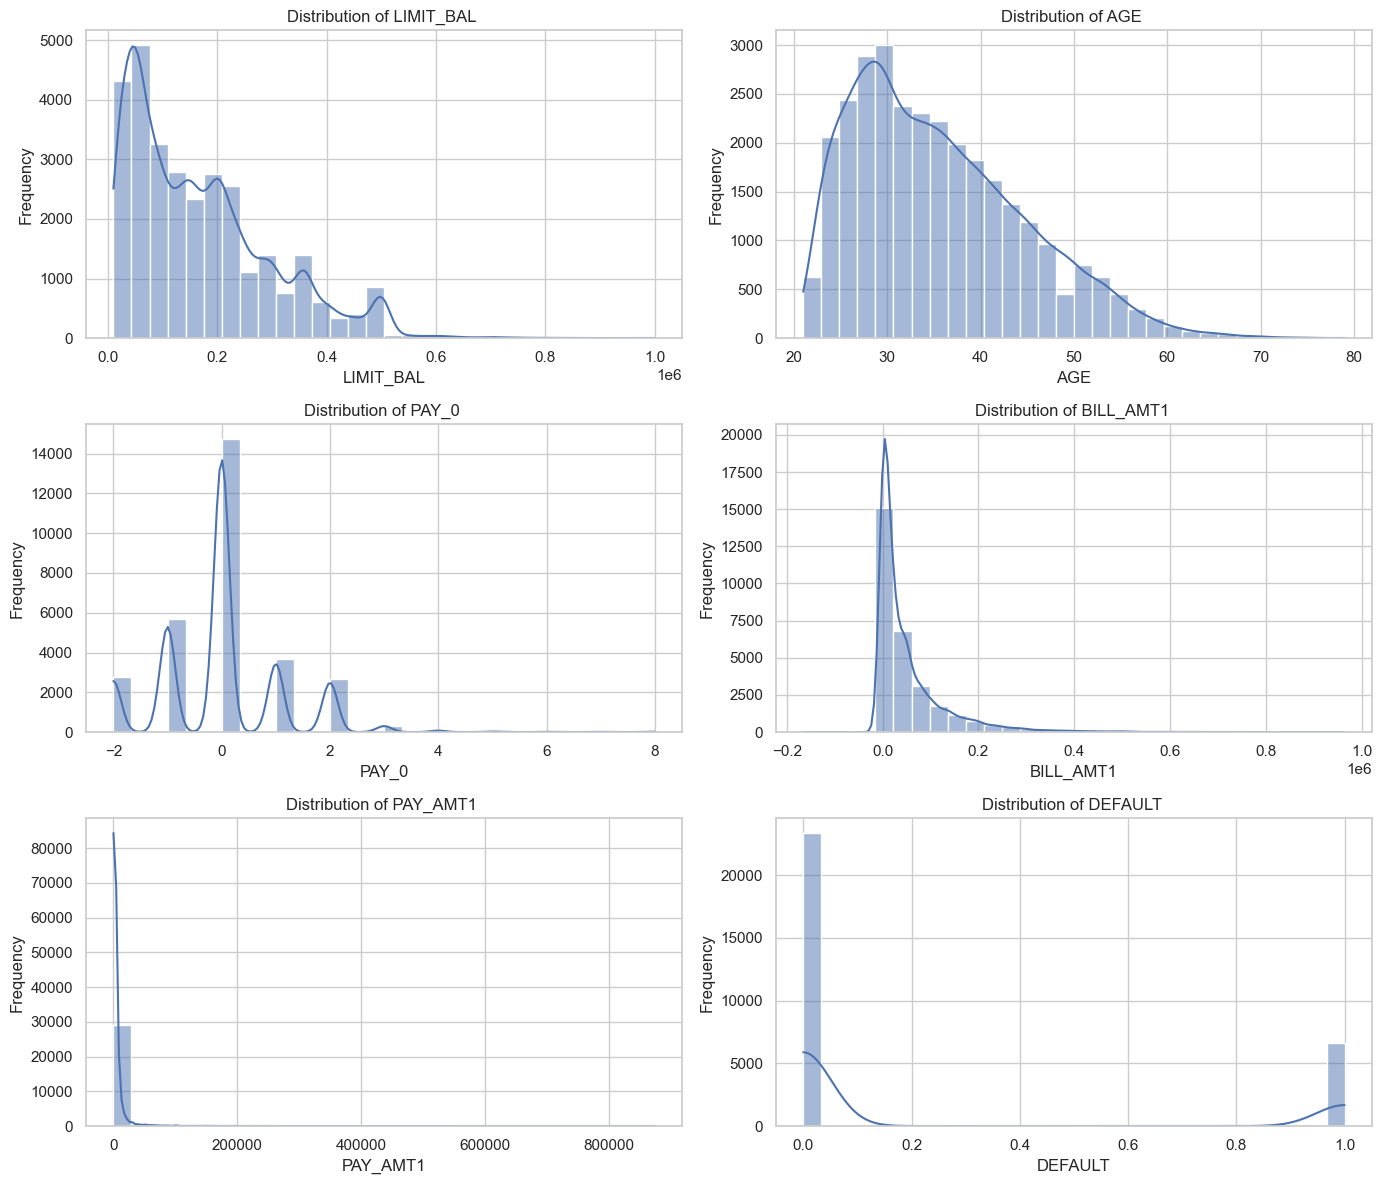

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Defining a function to create a grid of histograms for the selected columns
def plot_histograms(dataframe, columns, title_suffix=''):
    """
    Plots histograms with KDE for the specified numeric columns in the given dataframe.

    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the data to plot.
    columns (list): A list of column names to plot.
    title_suffix (str): An optional suffix to add to the plot titles.
    """
    num_plots = len(columns)
    num_rows = (num_plots + 1) // 2  # Calculating the number of rows needed (2 plots per row)

    fig, axs = plt.subplots(num_rows, 2, figsize=(14, 4 * num_rows))

    for ax, col in zip(axs.flatten(), columns):
        sns.histplot(dataframe[col], bins=30, kde=True, ax=ax)
        ax.set_title(f'Distribution of {col} {title_suffix}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Defining a list of columns to visualize
columns_to_plot = ['LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1', 'DEFAULT']

# Creating a grid of histograms for the selected columns
plot_histograms(dataset, columns_to_plot, title_suffix='')


**Histograms of Numeric Values**

![image.png](attachment:image.png)

**Outcomes**

- LIMIT_BAL (Credit Amount):

    - The distribution is right-skewed with a peak around the lower amounts (10,000 to 50,000 NT dollars).
    - A smaller number of customers have higher credit limits, with some outliers having limits up to 1,000,000 NT dollars.

- AGE:

    - The age distribution is slightly right-skewed, with the majority of customers being in their 20s to 40s.
    - There are fewer customers in the older age groups (50 and above).

- PAY_0 (Repayment Status in September 2005):

    - There are undefined values -2 and 0 in this variable which might be -1 in fact.
    - The distribution shows a peak at 0, and assuming it as -1 would indicate many customers paid duly in September 2005.
    - There are noticeable counts at 1 and 2, representing delays of one and two months, respectively.

- BILL_AMT1 (Bill Statement Amount in September 2005):

    - The distribution is right-skewed with most bill amounts concentrated at the lower end (below 100,000 NT dollars).
    - There are some extreme values (outliers) with bill amounts going up to nearly 900,000 NT dollars.

- PAY_AMT1 (Amount Paid in September 2005):

    - The distribution is heavily right-skewed, with most payments being relatively small (below 10,000 NT dollars).
    - There are a few outliers with very large payment amounts.

- DEFAULT (Default Payment Next Month):

    - The binary distribution shows that a majority of customers (about 78%) did not default, while approximately 22% did.

##### 1.2.4.2 Distribution Analysis for Categorical Variables

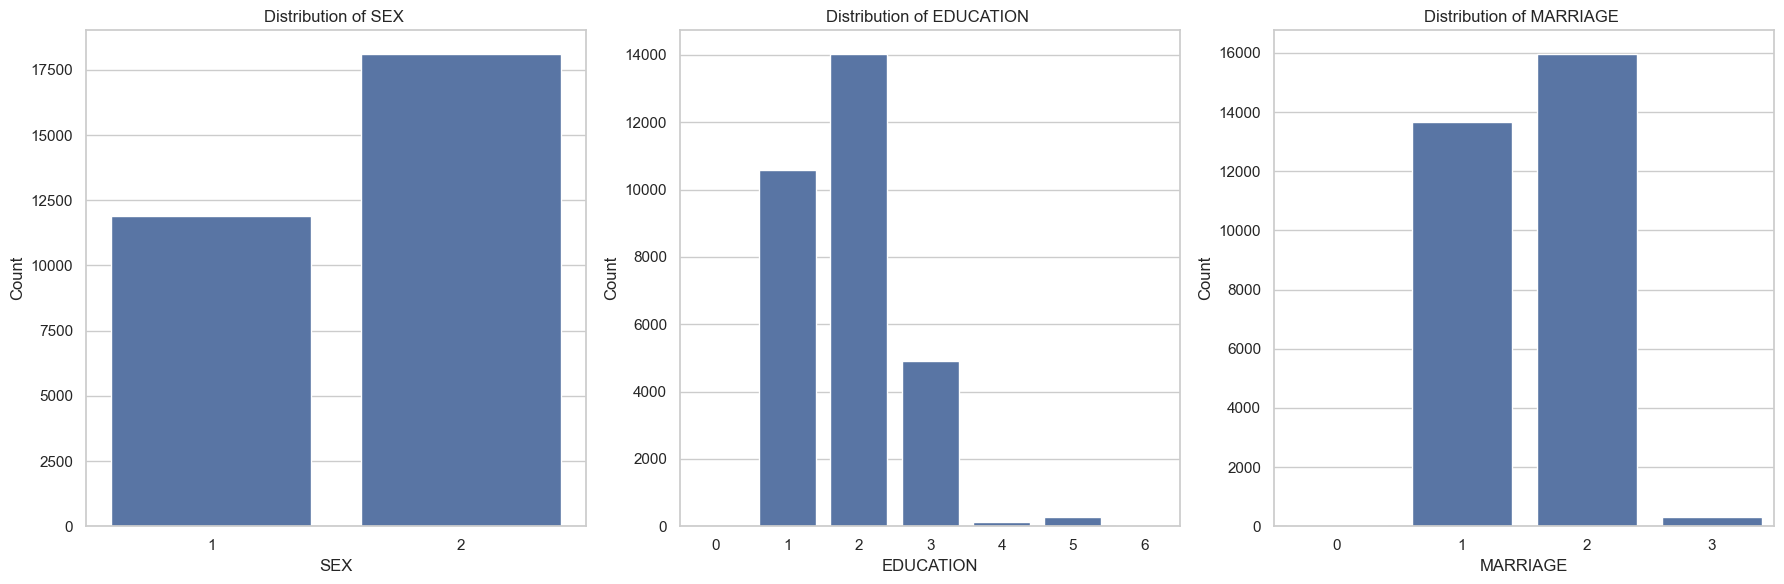

In [ ]:
# Define a list of categorical columns to visualize
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE']

# Defining a function to create a grid of bar plots for the selected columns
def plot_bars(dataframe, columns, title_suffix=''):
    """
    Plots bars for the specified categorical columns in the given dataframe.

    Parameters:
    dataframe (pd.DataFrame): The dataframe containing the data to plot.
    columns (list): A list of column names to plot.
    title_suffix (str): An optional suffix to add to the plot titles.
    """
    num_plots = len(columns)
    num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed (3 plots per row)

    fig, axs = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))

    for ax, col in zip(axs.flatten(), columns):
        sns.countplot(x=dataframe[col], ax=ax)
        ax.set_title(f'Distribution of {col} {title_suffix}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')

    plt.tight_layout()
    plt.show()

# Create bar plots for the selected columns
plot_bars(dataset, categorical_columns, '')


**Count Plot of Categorical Variables**

![image.png](attachment:image.png)

**Value Couts for Categorical Variables**

In [ ]:
# Show value counts for each categorical variable to identify rare categories or imbalances
sex_counts = dataset['SEX'].value_counts()
education_counts = dataset['EDUCATION'].value_counts()
marriage_counts = dataset['MARRIAGE'].value_counts()

print("SEX value counts:\n", sex_counts)
print("\nEDUCATION value counts:\n", education_counts)
print("\nMARRIAGE value counts:\n", marriage_counts)


SEX value counts:
 SEX
2    18112
1    11888
Name: count, dtype: int64

EDUCATION value counts:
 EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

MARRIAGE value counts:
 MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


**Outcomes**

- SEX:
    - Values: 1 (male), 2 (female);
    - There are more females than males in the dataset, but no significant imbalance needing adjustment.

- EDUCATION:
    - Values: 1 (graduate school), 2 (university), 3 (high school), 4 (others);
    - Rare categories (0, 5, 6) should be combined into 4 (others).

- MARRIAGE:
    - Values: 1 (married), 2 (single), 3 (others);
    - Category 0 should be combined into 3 (others).

##### 1.2.4.3 Outliers

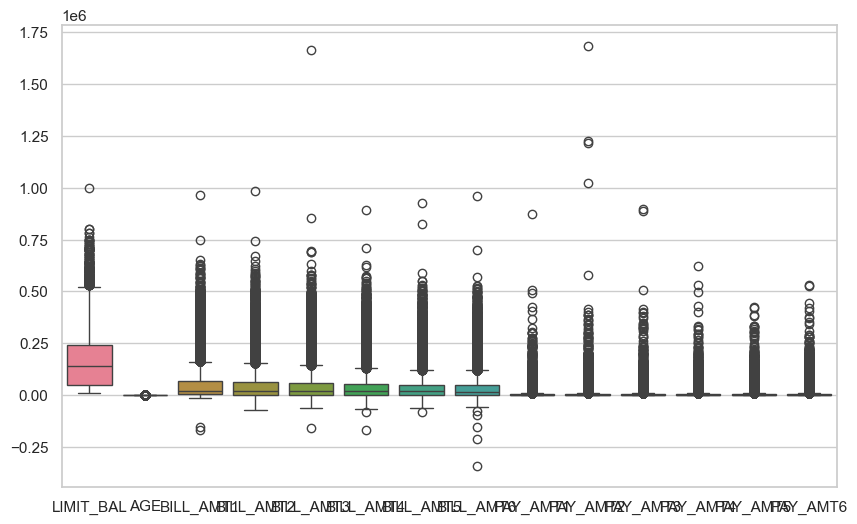

"\n# Remove outliers\nQ1 = data['feature_name'].quantile(0.25)\nQ3 = data['feature_name'].quantile(0.75)\nIQR = Q3 - Q1\ndata = data[(data['feature_name'] >= (Q1 - 1.5 * IQR)) & (data['feature_name'] <= (Q3 + 1.5 * IQR))]\n"

In [ ]:
# Visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset[numeric_columns])
plt.show()

"""
# Remove outliers
Q1 = data['feature_name'].quantile(0.25)
Q3 = data['feature_name'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['feature_name'] >= (Q1 - 1.5 * IQR)) & (data['feature_name'] <= (Q3 + 1.5 * IQR))]
"""

#### 1.2.5 Initial Findings

General Information:
- The datasetset contains 30,000 records.
- The average amount of given credit (LIMIT_BAL) is 167,484 NT dollars, with a standard deviation of 129,747 NT dollars.

Demographic Variables:
- The average age (AGE) of the customers is about 35.5 years, with a standard deviation of 9.2 years.
- Gender (SEX) has a roughly equal distribution with an average value close to 1.6, indicating a slightly higher number of females (since 2 = female).
- Education (EDUCATION) is skewed towards university graduates (average value 1.85, closer to 2).
- Marital status (MARRIAGE) shows a majority of married or single individuals (average value 1.55, closer to 1 or 2).

Payment History:
- The repayment status variables (PAY_0 to PAY_6) indicate that most payments are made on time (negative or zero values), but there are instances of delayed payments (positive values).
- The mean values for repayment statuses are slightly negative, indicating that on average, customers pay duly.

Bill Statement Amounts:
- The amounts of the bill statements (BILL_AMT1 to BILL_AMT6) vary widely, with mean values around 38,000 to 43,000 NT dollars and high standard deviations.
- Some negative values are present, which may indicate refunds or adjustments.

Previous Payments:
- The amounts paid in the past months (PAY_AMT1 to PAY_AMT6) also show wide variability, with mean values around 5,000 to 6,000 NT dollars.

Payment Default:
- About 22.1% of the customers defaulted on their payments, as indicated by the DEFAULT column with a mean value of 0.221.

Outliers:
- LIMIT_BAL: There are several outliers above the upper whisker.
- AGE: There are a few outliers below the lower whisker.
- PAY_0: Outliers are present below the lower whisker.
- BILL_AMT1: There are many outliers above the upper whisker.
- PAY_AMT1: Numerous outliers are present above the upper whisker.

#### 1.2.6 Issues to Address

1.2.6.1 **Invalid Values** <br>

*Based on intervals defined for each feature (column) there are some invalid values*:
- EDUCATION
    - '0', '5' and '6' have no related attributes in this column.
    - These values must change to '4' (=others).
- MARRIAGE
    - '0' has no related attribute in this column.
    - It must change to '3' (=others).
- PAY_0 to PAY_6 (Repayment Status)
    - '-2' and '0' have no related attributes in this column.
    - We assume that '0' represents a neutral state or no delay, which is typically used in many credit scoring systems to indicate on-time payments. So we will substitute '0' with '-1'.
    - We assume '-2' is an entry error so again we will substitute it with '-1'.


1.2.6.2 **Negative Amounts** <br>

*there are some negative amounts in bills (BILL_AMT1 to BILL_AMT6)*

- Possible reasons for negative bill amounts:

    - Refunds or Reversals <br>
     Negative values could indicate that a refund or a reversal of charges was processed on the account.

    - Credits <br>
     It could also mean that credits were applied to the account, such as promotional credits or overpayments from previous months.

    - Data Entry Errors<br>
     Negative values might result from data entry errors.
     
- We assume that negative values represent legitimate refunds or credits so they should be kept as is, as they reflect real account activities.

### 1.3 **Handle Categorical Variables**

Based on the mentioned solutions for invalid values in categorical variables we will replace them with meaningful values.

In [ ]:
# Correct invalid values in categorical variables
dataset['EDUCATION'] = dataset['EDUCATION'].replace({5: 4, 6: 4, 0: 4})
dataset['MARRIAGE'] = dataset['MARRIAGE'].replace({0: 3})

# Print values ascendingly with their counts
print(dataset['EDUCATION'].value_counts().sort_index(ascending=True))
# Print values with their ascending counts
print(dataset['MARRIAGE'].value_counts())


EDUCATION
1    10585
2    14030
3     4917
4      468
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64


### 1.4 **Address Invalid Values**

The repayment status should be in the range from -1 to 9. So we inspect and correct any values outside this range.

In [ ]:
# Display unique values in repayment status columns
print(dataset['PAY_0'].unique())
print(dataset['PAY_2'].unique())
print(dataset['PAY_3'].unique())
print(dataset['PAY_4'].unique())
print(dataset['PAY_5'].unique())
print(dataset['PAY_6'].unique())

# Correct invalid values in repayment status columns (if any)
# We'll assume -2 is invalid and replace it with -1 (pay duly)
# Again we'll assume 0 represents a neutral state or no delay, and replace it with -1 (pay duly)
dataset[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] = dataset[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].replace({-2: -1, 0: -1})

# Check the unique values in each column which will be returned as NumPy arrays
print(dataset[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(pd.Series.unique))


[ 2 -1  0 -2  1  3  4  8  7  5  6]
[ 2  0 -1 -2  3  5  7  4  1  6  8]
[-1  0  2 -2  3  4  6  7  1  5  8]
[-1  0 -2  2  3  4  5  7  6  1  8]
[-2  0 -1  2  3  5  4  7  8  6]
[-2  2  0 -1  3  6  4  7  8  5]
PAY_0    [2, -1, 1, 3, 4, 8, 7, 5, 6]
PAY_2    [2, -1, 3, 5, 7, 4, 1, 6, 8]
PAY_3    [-1, 2, 3, 4, 6, 7, 1, 5, 8]
PAY_4    [-1, 2, 3, 4, 5, 7, 6, 1, 8]
PAY_5       [-1, 2, 3, 5, 4, 7, 8, 6]
PAY_6       [-1, 2, 3, 6, 4, 7, 8, 5]
dtype: object


### 1.5 **The Modified Dataset**

#### 1.5.1 Check The New Dataset

In [ ]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,-1,-1,-1,-1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,-1,-1,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### 1.5.2 Statistical Details

In [ ]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.415967,-0.532033,-0.555500,-0.624233,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,1.142591,1.146393,1.126275,1.067522,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### 1.6 **Standardization of Numeric Values**

Standardize numeric variables, particularly those with high variance.

In [ ]:

# Import the 'StandardScaler' class for standardization
from sklearn.preprocessing import StandardScaler

# Build an instance for the scaler
scaler = StandardScaler()

# Define the numeric variables/columns
numeric_columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Implement the feature scaling
dataset_standardized = dataset.copy()
dataset_standardized[numeric_columns] = scaler.fit_transform(dataset_standardized[numeric_columns])


## 2. **Analysis**

### 2.1 **Distribution Analysis**

#### 2.1.1 Distribution Analysis for Numeric Variables

##### 2.1.1.1 Distribution of Standardized Dataset

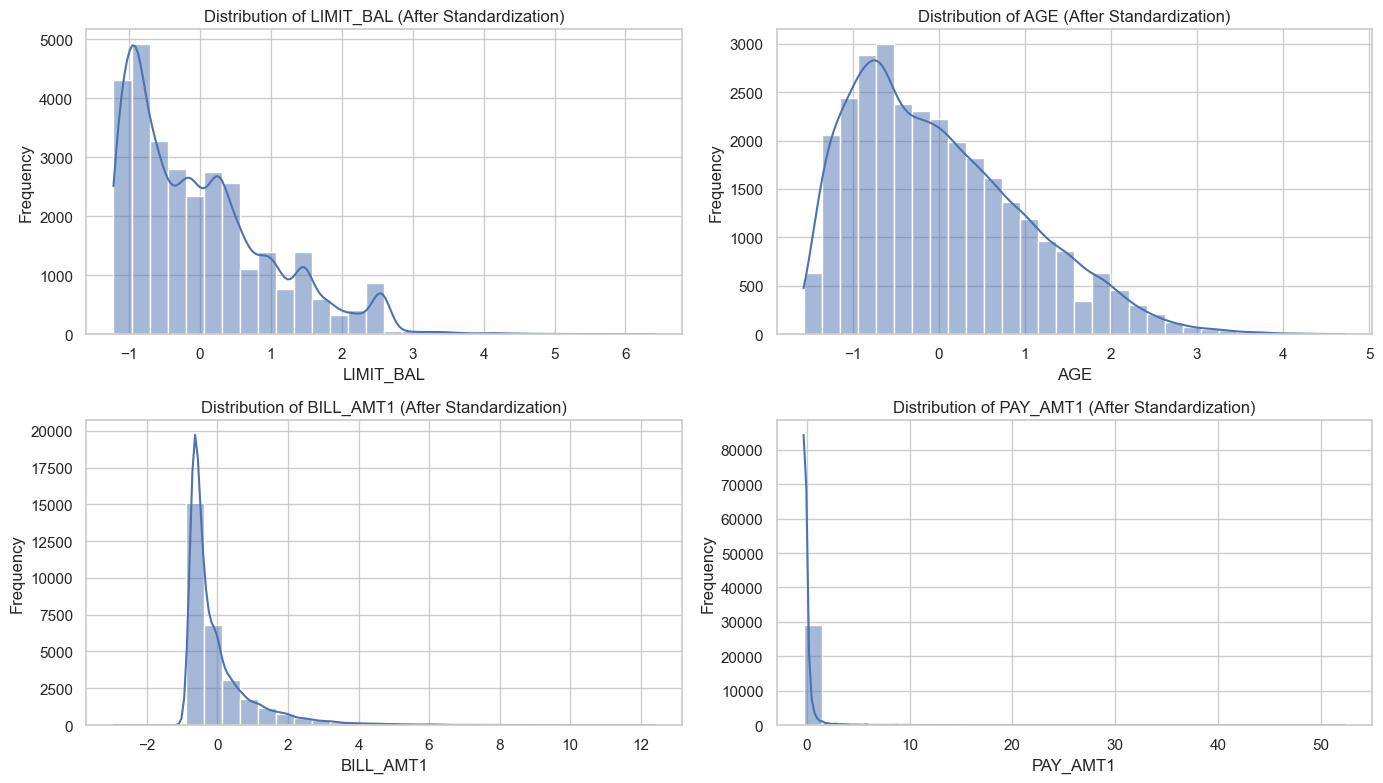

In [ ]:

# Set the style for the plots
sns.set(style="whitegrid")

# Define a list of columns to visualize
numeric_columns_to_plot = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']

# Create a grid of histograms for the selected columns
plot_histograms(dataset_standardized, numeric_columns_to_plot, title_suffix='(After Standardization)')


**The Output**

![image-2.png](attachment:image-2.png)

**Checking Normality**

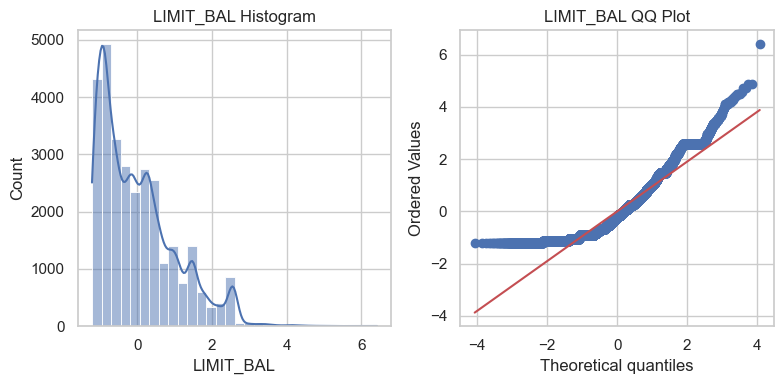

C:\Users\MirNezami\AppData\Local\Temp\ipykernel_4812\826591373.py:18: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  stat, p = stats.shapiro(data[col])


Shapiro-Wilk test for LIMIT_BAL: p-value = 7.685548825062829e-84
LIMIT_BAL does not look normally distributed



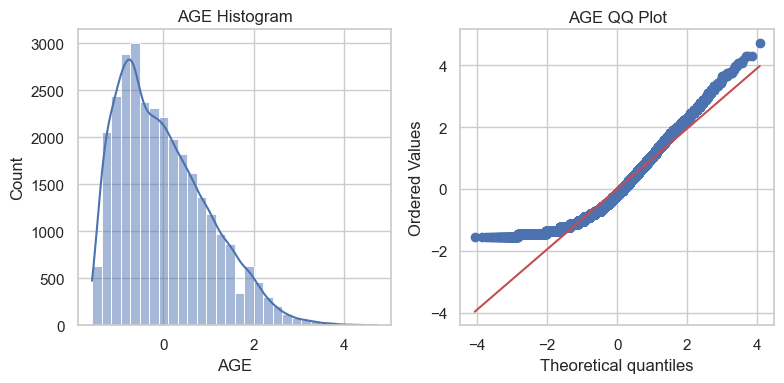

C:\Users\MirNezami\AppData\Local\Temp\ipykernel_4812\826591373.py:18: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  stat, p = stats.shapiro(data[col])


Shapiro-Wilk test for AGE: p-value = 3.376204065951019e-70
AGE does not look normally distributed



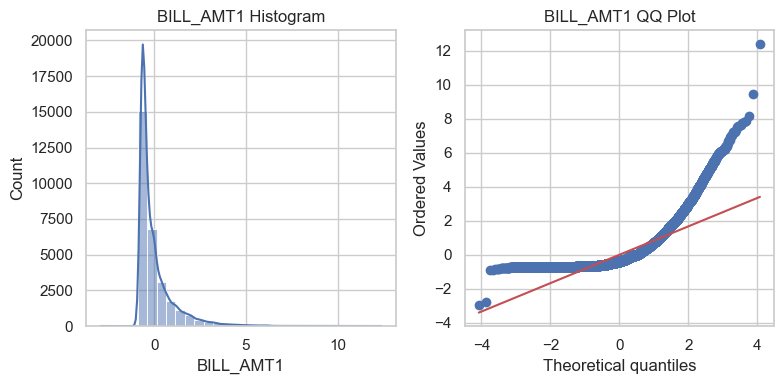

C:\Users\MirNezami\AppData\Local\Temp\ipykernel_4812\826591373.py:18: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  stat, p = stats.shapiro(data[col])


Shapiro-Wilk test for BILL_AMT1: p-value = 1.5665395471514678e-113
BILL_AMT1 does not look normally distributed



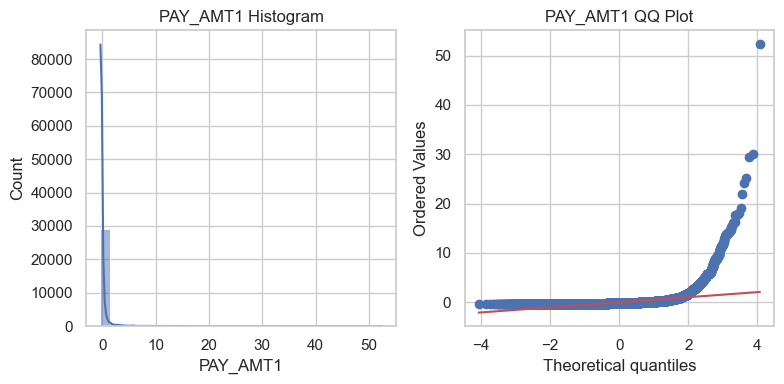

Shapiro-Wilk test for PAY_AMT1: p-value = 8.241534436795937e-139
PAY_AMT1 does not look normally distributed



C:\Users\MirNezami\AppData\Local\Temp\ipykernel_4812\826591373.py:18: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  stat, p = stats.shapiro(data[col])


In [ ]:
from scipy import stats

# Define a function to plot QQ plots and perform Shapiro-Wilk test
def check_normality(data, cols):
    for col in cols:
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(data[col], bins=30, kde=True)
        plt.title(f'{col} Histogram')

        plt.subplot(1, 2, 2)
        stats.probplot(data[col], dist="norm", plot=plt)
        plt.title(f'{col} QQ Plot')

        plt.tight_layout()
        plt.show()

        stat, p = stats.shapiro(data[col])
        print(f'Shapiro-Wilk test for {col}: p-value = {p}')
        if p > 0.05:
            print(f'{col} looks normally distributed\n')
        else:
            print(f'{col} does not look normally distributed\n')

# Check normality for the standardized data
check_normality(dataset_standardized, numeric_columns_to_plot)


As shown, the distribution of numeric variables is non-normal and we need transformation before standardization. So we will try the log transformation.

##### 2.1.1.2 The Distribution after Log Transformation and Standardization

c:\Users\MirNezami\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\MirNezami\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


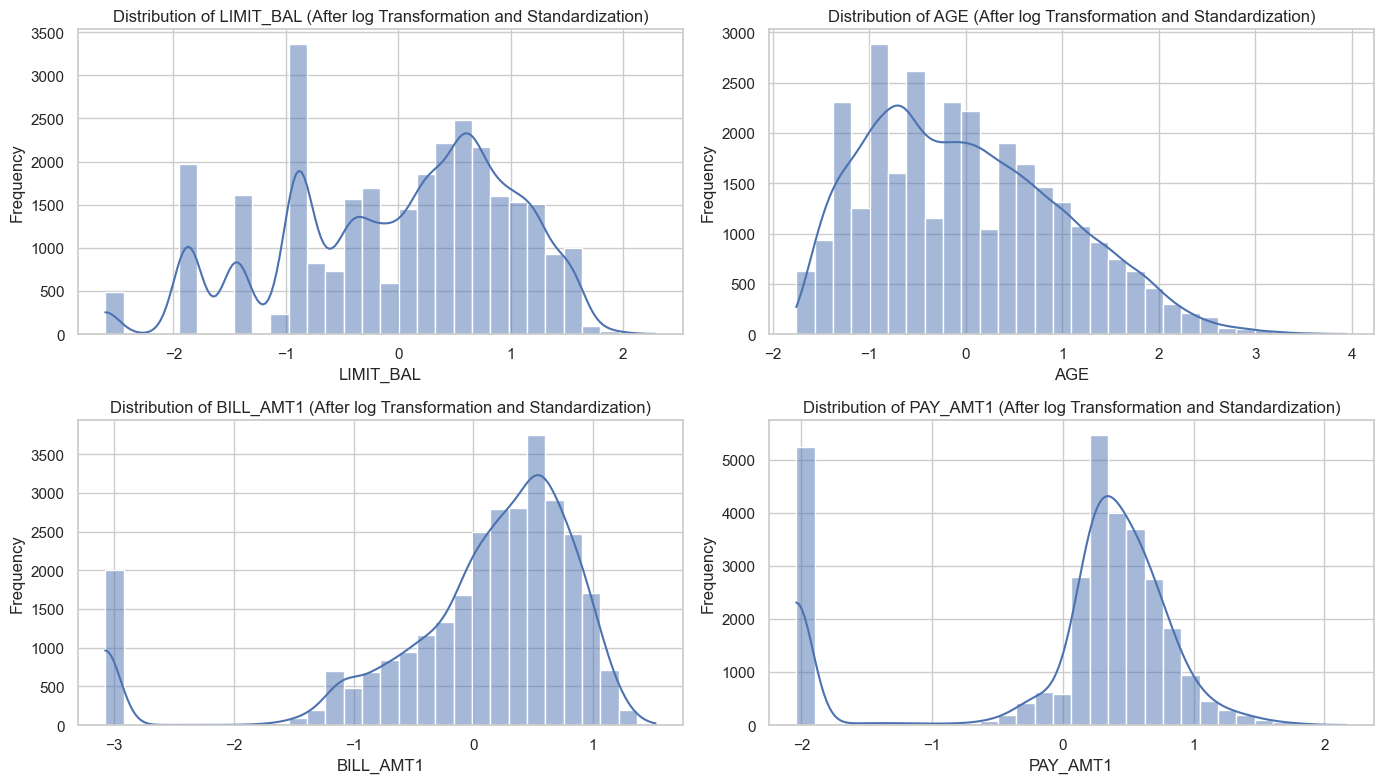

In [ ]:
# The numeric variables which are skewed and need transformation
transforming_numeric_columns = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Applying log transformation to skewed variables
data_log_transformed = dataset.copy()

for col in transforming_numeric_columns:
    data_log_transformed[col] = np.log1p(data_log_transformed[col])

# Applying square root transformation to moderate right-skewness
data_log_transformed['AGE'] = np.sqrt(data_log_transformed['AGE'])

# No transformation applied to PAY_0 as it is discrete

# Replacing inf values with NaN
data_log_transformed.replace([np.inf, -np.inf], np.nan, inplace=True)

# Checking for NaN values
#print("NaN values per column before handling:", data_log_transformed.isna().sum())

# Option 1: Fill NaN values with the mean of each column
data_log_transformed.fillna(data_log_transformed.mean(), inplace=True)

# Option 2: Drop rows with NaN values
# data_log_transformed.dropna(inplace=True)

# Checking for NaN values after handling
#print("NaN values per column after handling:", data_log_transformed.isna().sum())

# Standardization after transformation
data_log_transformed_standardized = pd.DataFrame(scaler.fit_transform(data_log_transformed[numeric_columns]), columns=numeric_columns)
# numeric_columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Creating histograms for the transformed and standardized columns
plot_histograms(data_log_transformed_standardized, numeric_columns_to_plot, title_suffix='(After log Transformation and Standardization)')
# numeric_columns_to_plot = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']


**The Output**

![image-2.png](attachment:image-2.png)

**Checking Normality**

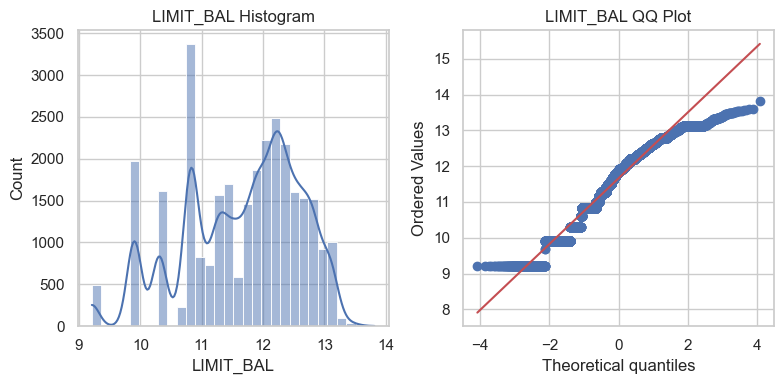

C:\Users\MirNezami\AppData\Local\Temp\ipykernel_4812\826591373.py:18: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  stat, p = stats.shapiro(data[col])


Shapiro-Wilk test for LIMIT_BAL: p-value = 1.9765411695333693e-66
LIMIT_BAL does not look normally distributed



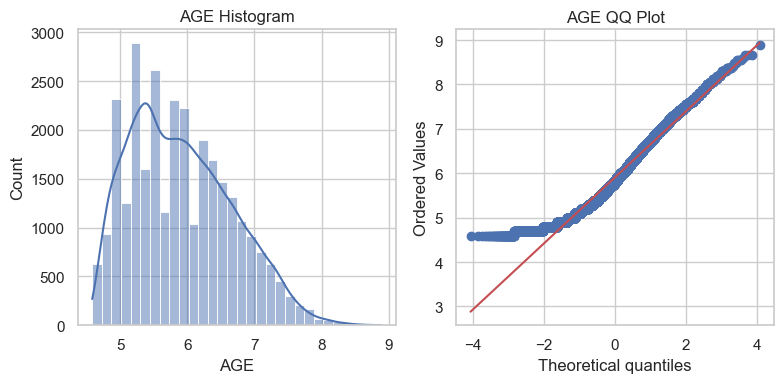

C:\Users\MirNezami\AppData\Local\Temp\ipykernel_4812\826591373.py:18: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  stat, p = stats.shapiro(data[col])


Shapiro-Wilk test for AGE: p-value = 2.047348309501678e-60
AGE does not look normally distributed



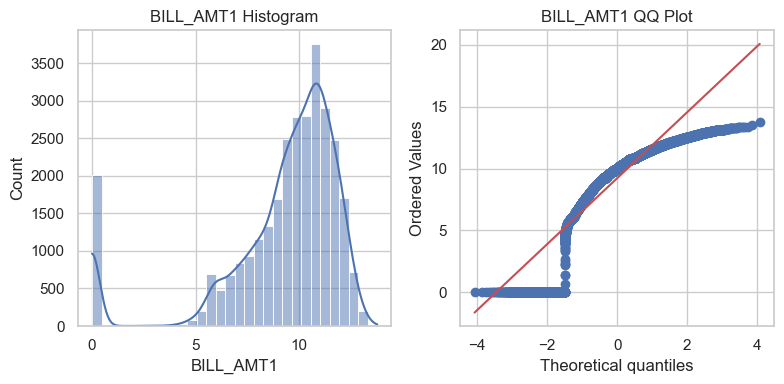

C:\Users\MirNezami\AppData\Local\Temp\ipykernel_4812\826591373.py:18: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  stat, p = stats.shapiro(data[col])


Shapiro-Wilk test for BILL_AMT1: p-value = 3.959149646889181e-104
BILL_AMT1 does not look normally distributed



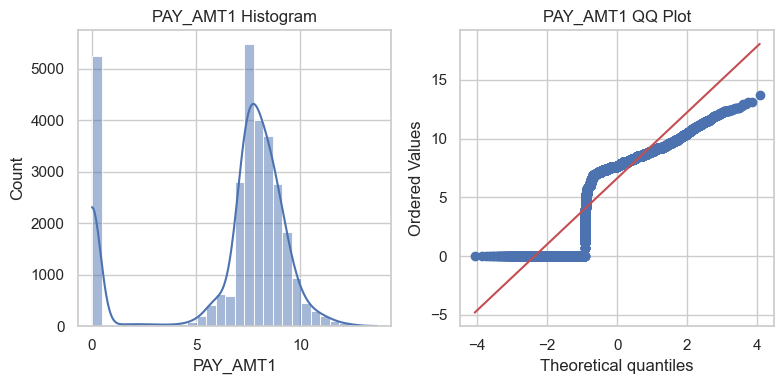

Shapiro-Wilk test for PAY_AMT1: p-value = 9.038658888324952e-109
PAY_AMT1 does not look normally distributed



C:\Users\MirNezami\AppData\Local\Temp\ipykernel_4812\826591373.py:18: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  stat, p = stats.shapiro(data[col])


In [ ]:

# Check normality for the transformed and standardized data
check_normality(data_log_transformed, numeric_columns_to_plot)


Again, the distribution of numeric variables is non-normal, and we must apply a more advanced transformation. The Box-Cox transformation is just for positive values so we will use Yeo-Johnson which is for both positive and negative amounts.

##### 2.1.1.3 The Distribution after Yeo-Johnson Transformation and Standardization

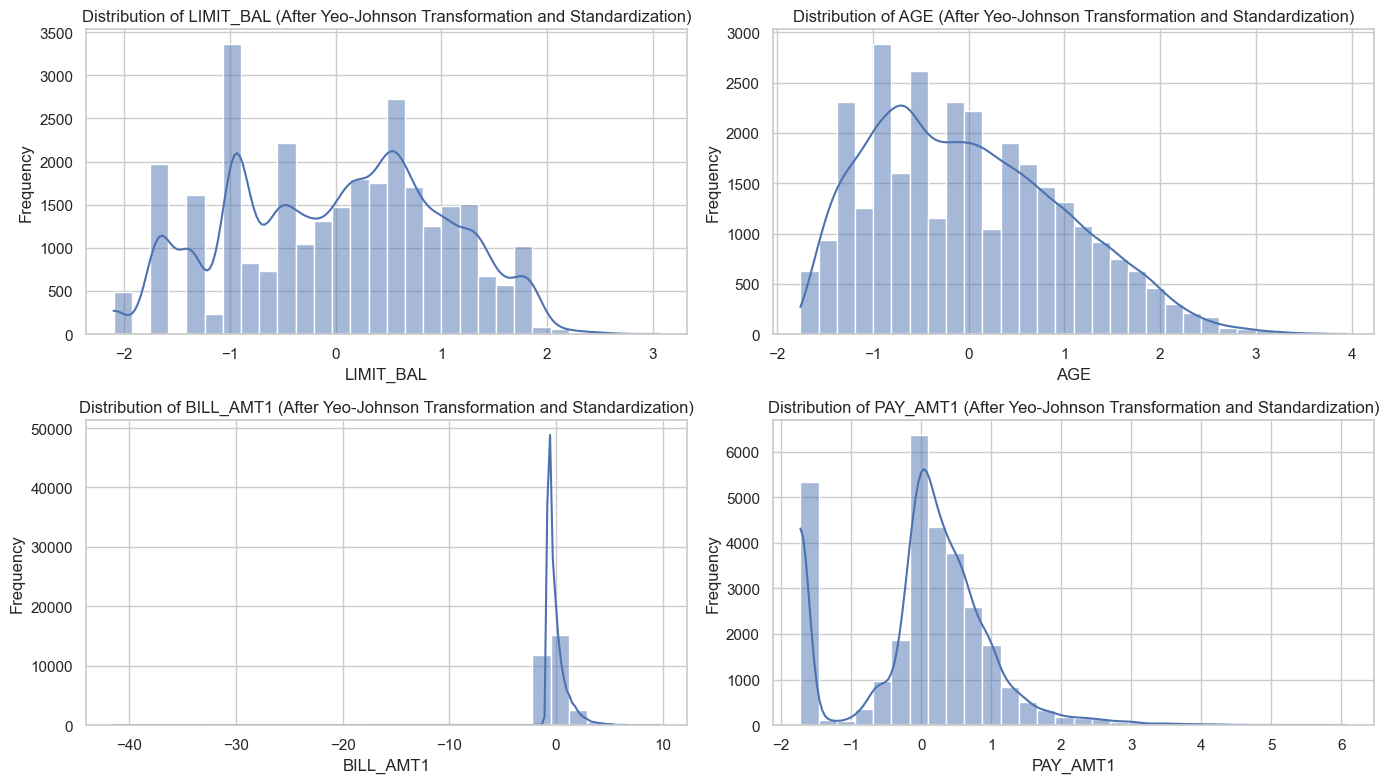

In [ ]:

# Applying Yeo-Johnson transformation to skewed variables
data_yj_transformed = dataset.copy()

for col in transforming_numeric_columns:
    data_yj_transformed[col], _ = stats.yeojohnson(data_yj_transformed[col])
    # transforming_numeric_columns = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    # The "stats.yeojohnson" function returns two values: the transformed data and the lambda parameter used for the transformation.
    # "_" is used to ignore the lambda parameter, as it is not needed in this context.

# Applying square root transformation to moderate right-skewness
data_yj_transformed['AGE'] = np.sqrt(data_yj_transformed['AGE'])

# No transformation applied to PAY_0 as it is discrete

# Standardizing after transformation
data_yj_transformed_standardized = pd.DataFrame(scaler.fit_transform(data_yj_transformed[numeric_columns]), columns=numeric_columns)
# numeric_columns = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Creating histograms for the transformed and standardized columns
plot_histograms(data_yj_transformed_standardized, numeric_columns_to_plot, title_suffix='(After Yeo-Johnson Transformation and Standardization)')
# numeric_columns_to_plot = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']


**The Output**

![image-2.png](attachment:image-2.png)

**Checking Normality**

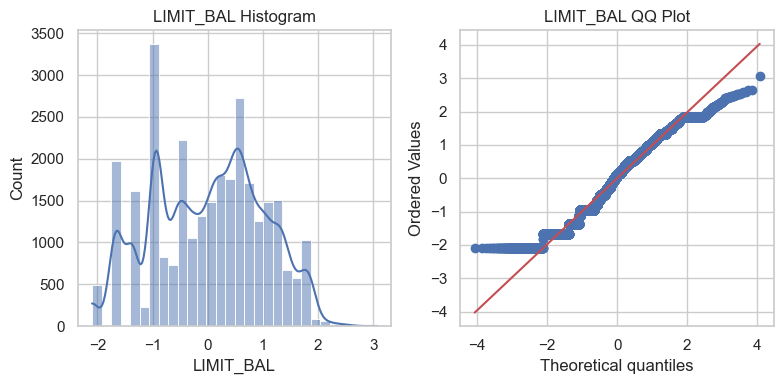

C:\Users\MirNezami\AppData\Local\Temp\ipykernel_4812\826591373.py:18: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  stat, p = stats.shapiro(data[col])


Shapiro-Wilk test for LIMIT_BAL: p-value = 2.39081620121165e-54
LIMIT_BAL does not look normally distributed



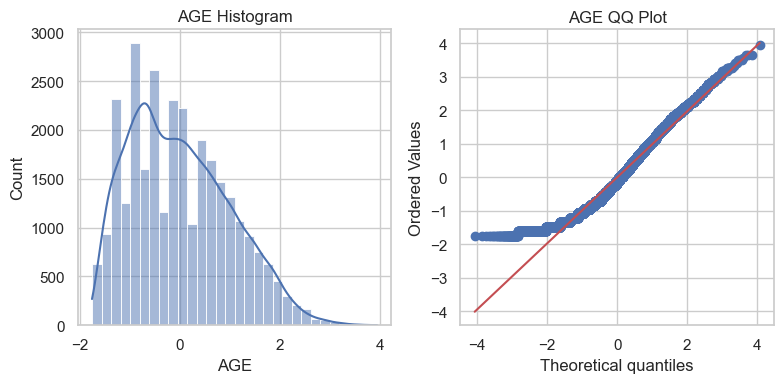

C:\Users\MirNezami\AppData\Local\Temp\ipykernel_4812\826591373.py:18: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  stat, p = stats.shapiro(data[col])


Shapiro-Wilk test for AGE: p-value = 2.047348309501678e-60
AGE does not look normally distributed



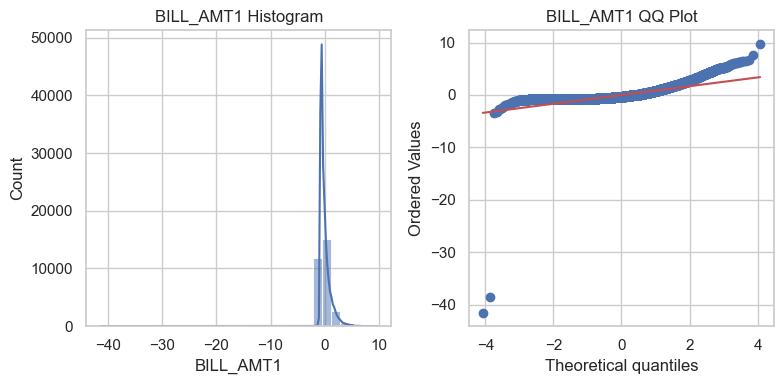

C:\Users\MirNezami\AppData\Local\Temp\ipykernel_4812\826591373.py:18: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  stat, p = stats.shapiro(data[col])


Shapiro-Wilk test for BILL_AMT1: p-value = 3.106435055346247e-113
BILL_AMT1 does not look normally distributed



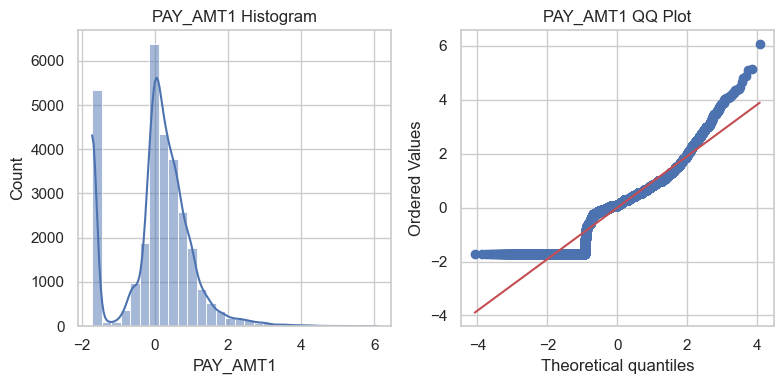

Shapiro-Wilk test for PAY_AMT1: p-value = 2.5117007665915424e-82
PAY_AMT1 does not look normally distributed



C:\Users\MirNezami\AppData\Local\Temp\ipykernel_4812\826591373.py:18: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  stat, p = stats.shapiro(data[col])


In [ ]:

# Check normality for the transformed and standardized data
check_normality(data_yj_transformed_standardized, numeric_columns_to_plot)


As shown, even after Yeo-Johnson transformation the normality in distribution of numeric variables is not appropriate. So in the last step we handle the outliers and check again the normality.

##### 2.1.1.4 Handling Outliers

Visualizing Outliers

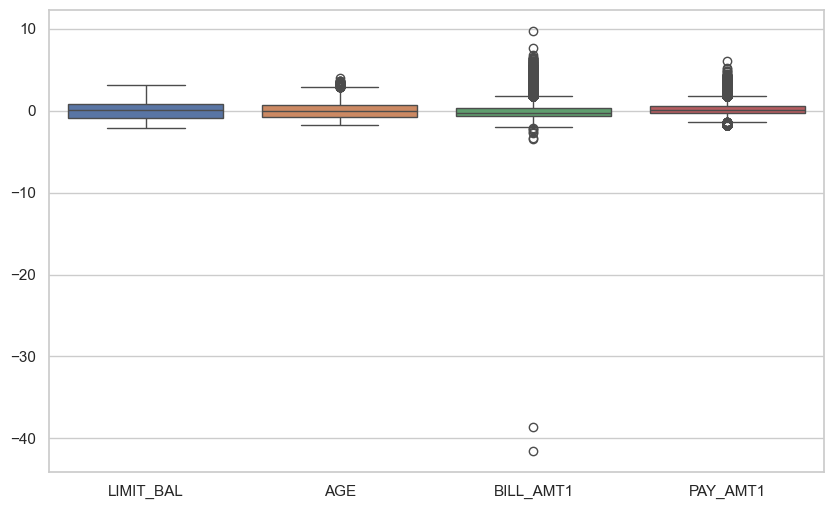

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_yj_transformed_standardized[numeric_columns_to_plot])
plt.show()

Cap or Floor Outliers

*Set outliers to the nearest acceptable value (capping). <br>
This may be useful because we believe that extreme values are valid but do not want them to disproportionately influence our analysis. It’s a good compromise between removing and keeping outliers.*

In [ ]:

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    return df

for col in transforming_numeric_columns:
    data_yj_transformed_standardized = cap_outliers(data_yj_transformed_standardized, col)


Visualizing Distribution of Variables

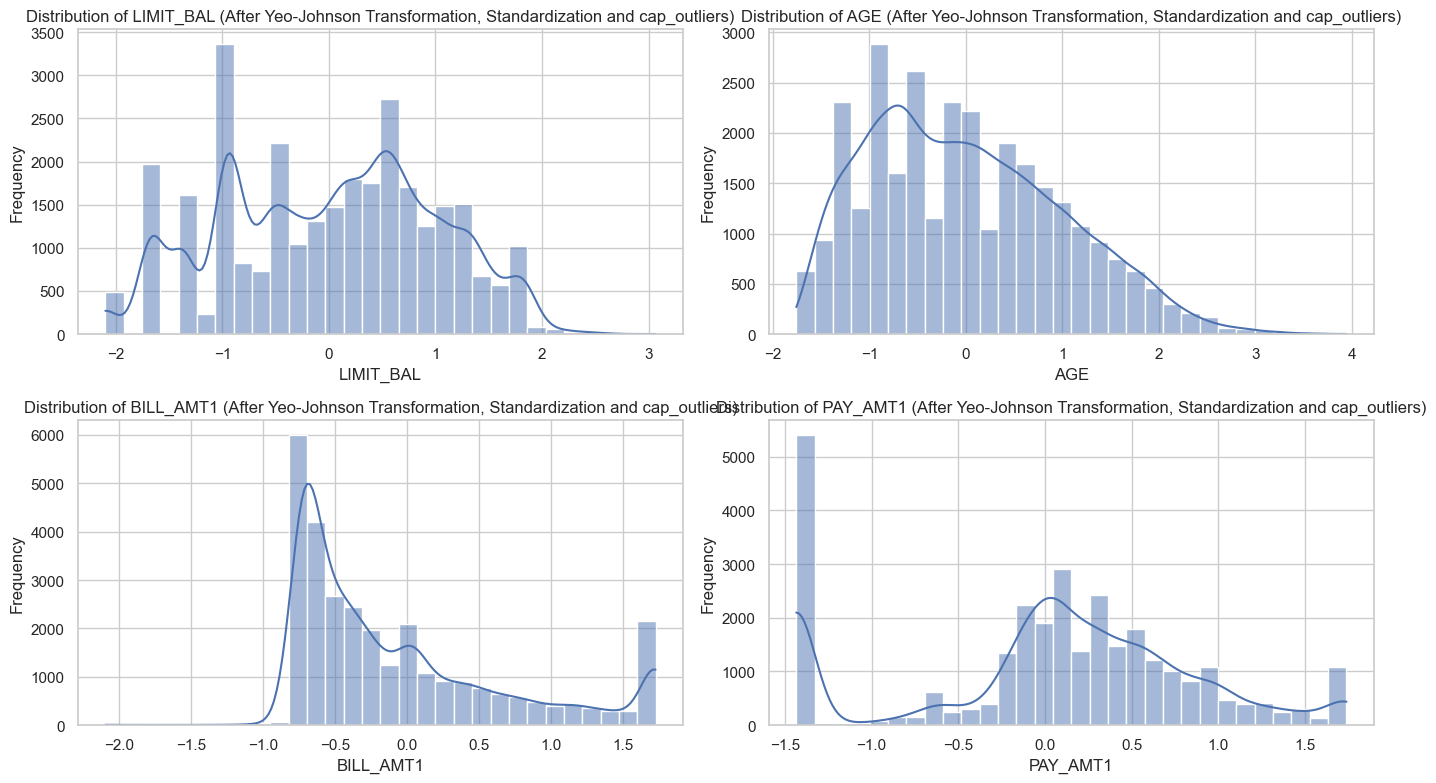

In [ ]:
# Creating histograms after capping outliers
plot_histograms(data_yj_transformed_standardized, numeric_columns_to_plot, title_suffix='(After Yeo-Johnson Transformation, Standardization and cap_outliers)')

Visualize Outliers after Capping

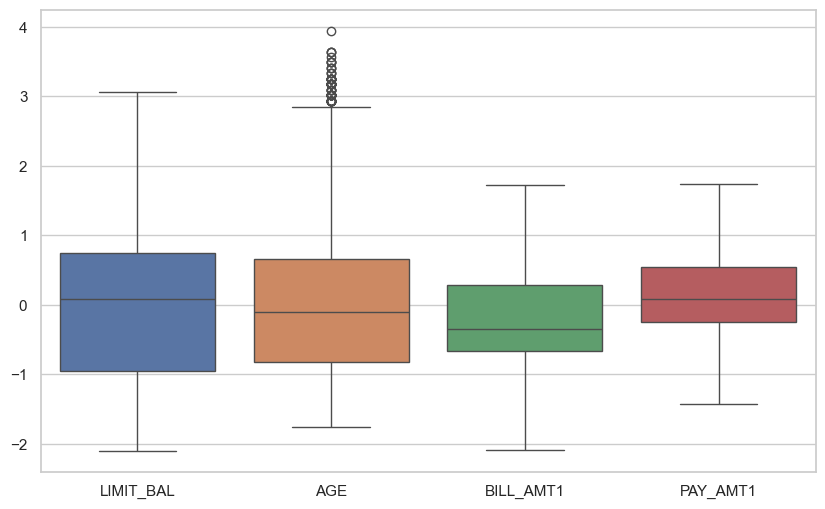

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_yj_transformed_standardized[numeric_columns_to_plot])
plt.show()

Final Checking Normality

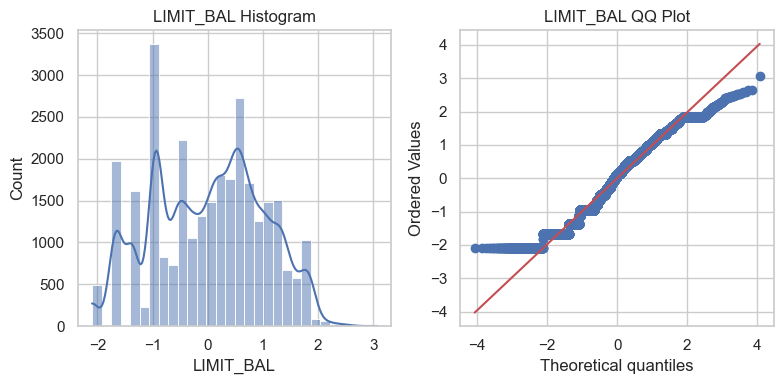

C:\Users\MirNezami\AppData\Local\Temp\ipykernel_4812\826591373.py:18: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  stat, p = stats.shapiro(data[col])


Shapiro-Wilk test for LIMIT_BAL: p-value = 2.39081620121165e-54
LIMIT_BAL does not look normally distributed



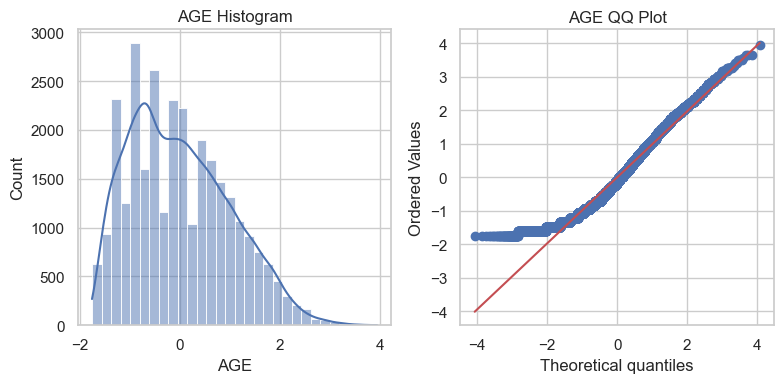

C:\Users\MirNezami\AppData\Local\Temp\ipykernel_4812\826591373.py:18: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  stat, p = stats.shapiro(data[col])


Shapiro-Wilk test for AGE: p-value = 2.047348309501678e-60
AGE does not look normally distributed



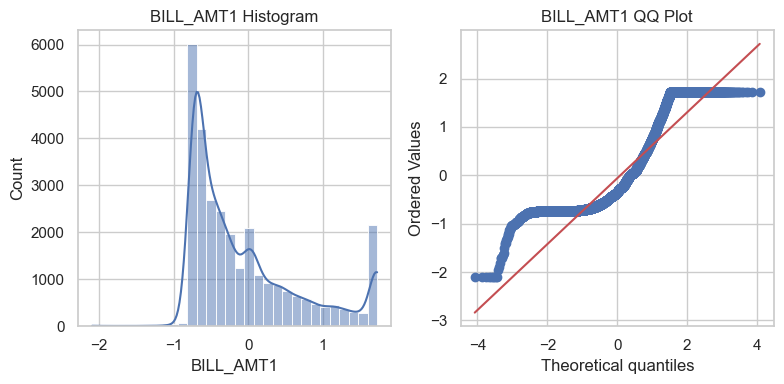

C:\Users\MirNezami\AppData\Local\Temp\ipykernel_4812\826591373.py:18: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  stat, p = stats.shapiro(data[col])


Shapiro-Wilk test for BILL_AMT1: p-value = 3.4338747375216434e-98
BILL_AMT1 does not look normally distributed



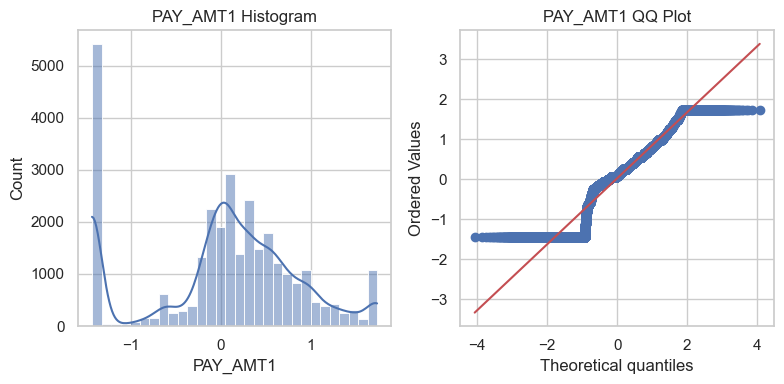

Shapiro-Wilk test for PAY_AMT1: p-value = 1.0633383079907964e-78
PAY_AMT1 does not look normally distributed



C:\Users\MirNezami\AppData\Local\Temp\ipykernel_4812\826591373.py:18: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30000.
  stat, p = stats.shapiro(data[col])


In [ ]:

# Check normality after capping outliers
check_normality(data_yj_transformed_standardized, numeric_columns_to_plot)


##### 2.1.1.5 Conclusion
Unfortunately, despite all the transformations, the normality of the distribution of the variables was not appropriate. So we use different datasets obtained, in related models and validate the performance to find the best model for credit default analysis.

#### 2.1.2 Distribution Analysis for Categorical Variables

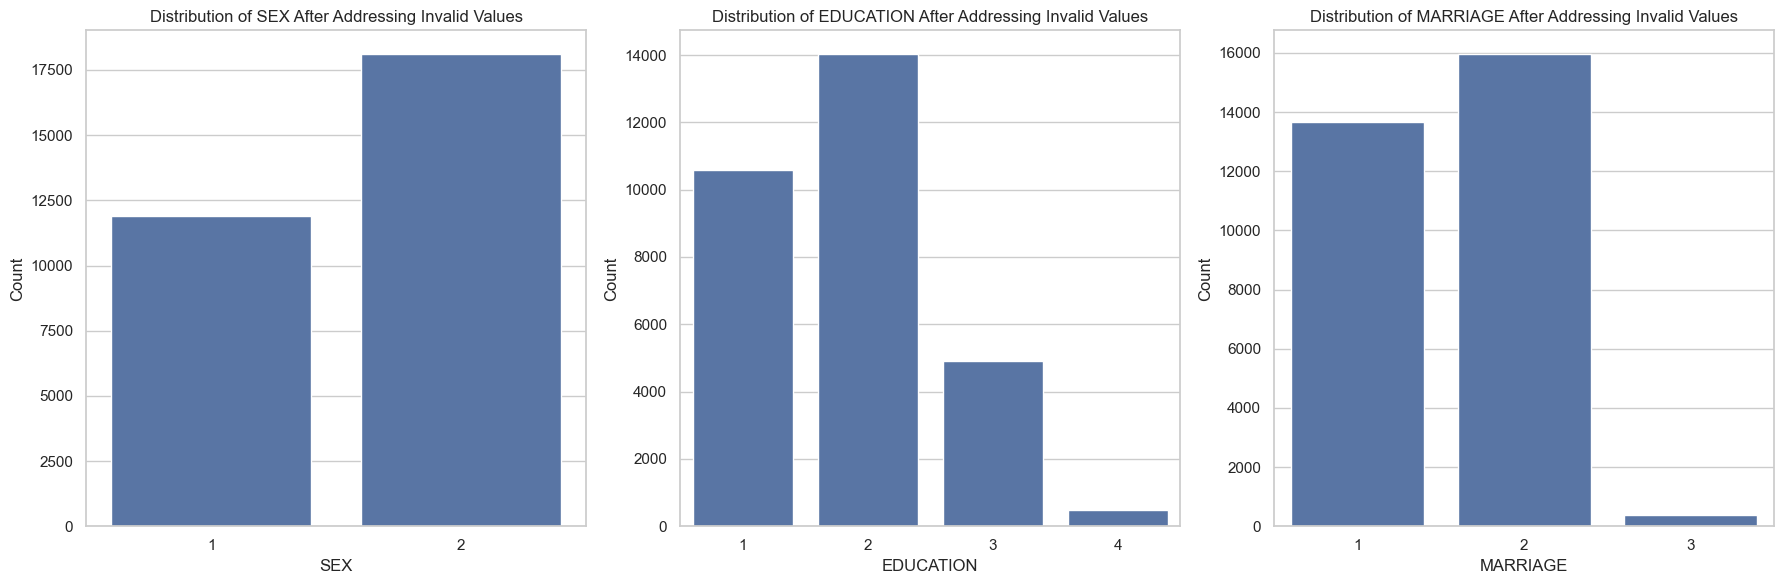

In [ ]:

# Create bar plots for the categorical variables
plot_bars(dataset, categorical_columns, 'After Addressing Invalid Values')

# categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE']

**Output**

![image.png](attachment:image.png)

**Value Counts for Categorical Variables**

In [ ]:
# Show value counts for each categorical variable to identify rare categories or imbalances
sex_counts = dataset['SEX'].value_counts()
education_counts = dataset['EDUCATION'].value_counts()
marriage_counts = dataset['MARRIAGE'].value_counts()

print("SEX value counts:\n", sex_counts)
print("\nEDUCATION value counts:\n", education_counts)
print("\nMARRIAGE value counts:\n", marriage_counts)


SEX value counts:
 SEX
2    18112
1    11888
Name: count, dtype: int64

EDUCATION value counts:
 EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

MARRIAGE value counts:
 MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64


Categorical variables are ready for analysis.

### 2.2 **Correlation Analysis**

#### 2.2.1 Concatenating New Dataset for Correlation Analysis

In [ ]:
repayment_status_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
# Concatenating transformed data with residual features and dependent variable.
data_yj = pd.concat([dataset[categorical_columns], dataset[repayment_status_columns], data_yj_transformed_standardized, dataset['DEFAULT']], axis=1)

# Checking the columns of the new dataset
print(data_yj.columns)

# Checking the statistics of the new dataset
data_yj.describe()

# Reminding the values and the scales of categorical variables and repayment status:
# SEX: (1 = male; 2 = female).
# EDUCATION: (1 = graduate school; 2 = university; 3 = high school; 4 = others).
# MARRIAGE: (1 = married; 2 = single; 3 = others).
# PAY_0 to PAY_6 (Repayment Status): History of past payment. (from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; . . .; PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; . . .; 9 = payment delay for nine months and above.

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')


,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.842267,1.557267,-0.415967,-0.532033,-0.555500,-0.624233,-0.679567,-0.670800,-1.989520e-16,...,-0.064246,-0.058885,-0.071570,0.029324,0.010591,-0.009485,-0.007307,-0.006216,-0.003233,0.221200
std,0.489129,0.744494,0.521405,1.142591,1.146393,1.126275,1.067522,1.001726,1.005283,1.000017e+00,...,0.716978,0.725268,0.685713,0.856609,0.898576,0.974203,0.980574,0.983223,0.990838,0.415062
min,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.098927e+00,...,-1.998143,-2.012882,-1.903972,-1.434178,-1.540371,-1.629996,-1.578070,-1.556978,-1.515825,0.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-9.539198e-01,...,-0.645799,-0.648262,-0.624012,-0.244334,-0.275326,-0.424171,-0.421542,-0.457350,-0.617000,0.000000
50%,2.000000,2.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,8.374056e-02,...,-0.320854,-0.297059,-0.316218,0.087015,0.100602,0.167497,0.173880,0.182035,0.215139,0.000000
75%,2.000000,2.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,7.521410e-01,...,0.255763,0.261484,0.229294,0.548896,0.568036,0.612684,0.625285,0.631127,0.636287,0.000000
max,2.000000,4.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,3.065845e+00,...,1.608106,1.626104,1.509253,1.738741,1.833081,2.167967,2.195527,2.263843,2.516217,1.000000


#### 2.2.2 Correlation Matrix

In [ ]:
# Calculation of the correlation matrix
correlation_matrix = data_yj.corr()
correlation_matrix

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
SEX,1.000000,0.013627,-0.028522,-0.032030,-0.043980,-0.040710,-0.038935,-0.037737,-0.031149,0.059731,...,-0.017149,-0.012138,-0.008970,-0.010989,0.000957,0.011047,0.006849,0.009616,0.027400,-0.039961
EDUCATION,0.013627,1.000000,-0.136797,0.050890,0.062625,0.053525,0.051595,0.039034,0.027471,-0.240711,...,0.019429,0.012921,0.010238,-0.019903,-0.021253,-0.015295,-0.020266,-0.029539,-0.034677,0.033842
MARRIAGE,-0.028522,-0.136797,1.000000,-0.012750,-0.009562,0.001921,-0.003777,-0.003064,0.002953,-0.118460,...,-0.019097,-0.020737,-0.017986,0.000211,-0.008860,-0.005355,-0.010008,-0.008749,-0.013671,-0.027575
PAY_0,-0.032030,0.050890,-0.012750,1.000000,0.700321,0.498070,0.440578,0.410408,0.363695,-0.189803,...,0.007781,0.016232,0.018467,-0.318616,-0.233014,-0.193097,-0.166641,-0.140265,-0.147460,0.398636
PAY_2,-0.043980,0.062625,-0.009562,0.700321,1.000000,0.654905,0.509104,0.464947,0.412276,-0.224334,...,0.050005,0.058657,0.058966,-0.349413,-0.178411,-0.125844,-0.106853,-0.082348,-0.089345,0.333438
PAY_3,-0.040710,0.053525,0.001921,0.498070,0.654905,1.000000,0.664212,0.531564,0.476073,-0.219089,...,0.035605,0.046193,0.047031,-0.081075,-0.345997,-0.160563,-0.115759,-0.092990,-0.104583,0.292026
PAY_4,-0.038935,0.051595,-0.003777,0.440578,0.509104,0.664212,1.000000,0.717638,0.566442,-0.208376,...,0.039216,0.054865,0.059718,-0.108526,-0.088572,-0.286594,-0.135526,-0.095323,-0.097041,0.274779
PAY_5,-0.037737,0.039034,-0.003064,0.410408,0.464947,0.531564,0.717638,1.000000,0.714158,-0.194518,...,0.054527,0.067738,0.073426,-0.115262,-0.100228,-0.073662,-0.236547,-0.104208,-0.091820,0.266465
PAY_6,-0.031149,0.027471,0.002953,0.363695,0.412276,0.476073,0.566442,0.714158,1.000000,-0.188639,...,0.048448,0.075218,0.075781,-0.093914,-0.105275,-0.077549,-0.037840,-0.230023,-0.104556,0.248252
LIMIT_BAL,0.059731,-0.240711,-0.118460,-0.189803,-0.224334,-0.219089,-0.208376,-0.194518,-0.188639,1.000000,...,0.236595,0.235186,0.238975,0.218901,0.214872,0.214606,0.218120,0.231918,0.266264,-0.171332


#### 2.2.3 Correlation with the Default Variable

##### 2.2.3.1 Calculating the Correlation

In [ ]:
# The correlation with the DEFAULT (dependent) variable
default_correlations = correlation_matrix['DEFAULT'].sort_values(ascending=False)

# Displaying the whole correlations with the DEFAULT variable
print(default_correlations.head(25))


DEFAULT      1.000000
PAY_0        0.398636
PAY_2        0.333438
PAY_3        0.292026
PAY_4        0.274779
PAY_5        0.266465
PAY_6        0.248252
EDUCATION    0.033842
AGE          0.010756
BILL_AMT6   -0.007603
BILL_AMT5   -0.011796
BILL_AMT4   -0.015113
BILL_AMT3   -0.019426
BILL_AMT2   -0.021017
MARRIAGE    -0.027575
BILL_AMT1   -0.027947
SEX         -0.039961
PAY_AMT5    -0.116403
PAY_AMT6    -0.117973
PAY_AMT4    -0.129528
PAY_AMT3    -0.143764
PAY_AMT2    -0.158129
PAY_AMT1    -0.170300
LIMIT_BAL   -0.171332
Name: DEFAULT, dtype: float64


##### 2.2.3.2 Positive Correlations

- PAY_0 (0.398636):

    - The repayment status in September 2005 (most recent month) has the highest positive correlation with default. This suggests that recent repayment behavior is a strong predictor of default.

- PAY_2 (0.333438):
    - The repayment status in August 2005 also shows a strong positive correlation, indicating that repayment behavior two months before is also significant.

- PAY_3 to PAY_6 (0.248252 to 0.292026):
    - The repayment status for the past months (April to July 2005) shows a decreasing trend in positive correlation as we go further back in time. This indicates that more recent repayment behaviors are stronger predictors of default.

- EDUCATION (0.033842):
    - This positive but weak correlation suggests that education level has a very slight association with default. It could imply that higher education levels might be slightly associated with higher default rates.
- AGE (0.010756):
    - Age has a very weak positive correlation with default, suggesting age alone isn't a strong predictor of default.

##### 2.2.3.3 Negative Correlations

- LIMIT_BAL (-0.171332):
    - The amount of given credit shows a significant negative correlation with default. Higher credit limits are associated with lower default rates, which makes sense as customers with higher credit limits might have better creditworthiness.

- PAY_AMT1 to PAY_AMT6 (-0.116403 to -0.170300):
    - Payment amounts in the last six months have moderate negative correlations with default. Higher payments indicate better financial health, reducing the likelihood of default.

- SEX (-0.039961):
    - There is a very weak negative correlation between sex and default. The correlation is too weak to draw any strong conclusions.

- MARRIAGE (-0.027575):
    - Marital status also shows a very weak negative correlation with default.
    
- BILL_AMT1 to BILL_AMT6 (-0.007603 to -0.027947):
    - The bill amounts for the past six months show very weak negative correlations with default. This suggests that the amounts owed on bills are not strongly associated with default likelihood.

##### 2.2.3.4 Conclustion of Correlation with Default

- Strong Predictors:
    - PAY_0 to PAY_6: Repayment status in recent months are the strongest predictors of default. These features should be given high importance in predictive modeling.
    - LIMIT_BAL: The amount of given credit is also an important feature and should be included in models.

- Moderate Predictors:
    - PAY_AMT1 to PAY_AMT6: Payment amounts in recent months have moderate predictive power and should be included in models.

- Weak Predictors:
    - EDUCATION, AGE, SEX, MARRIAGE, BILL_AMT1 to BILL_AMT6: These features have weak correlations with default and may not significantly improve model performance, but they can still be included for completeness.

#### 2.2.4 Heatmap of Correlations

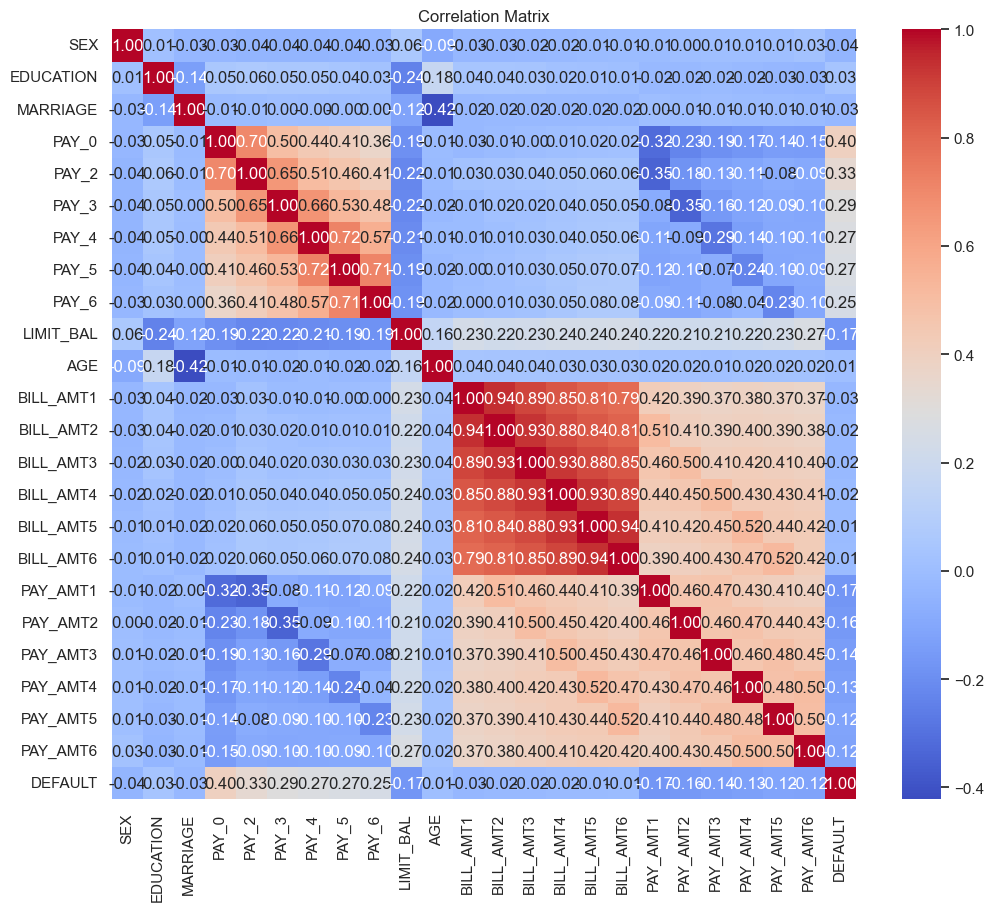

In [ ]:

# Plot the heatmap for correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### 2.2.5 Analysis of Other Notable Correlations

- Inter-correlations Among PAY Variables (PAY_0 to PAY_6):
    - These variables represent the repayment status for different months and are expected to be highly correlated with each other. This reflects consistent behavior in repayment status over time.

- Inter-correlations Among BILL_AMT Variables (BILL_AMT1 to BILL_AMT6):
    - High correlations among bill amounts for different months suggest that the bill amounts are consistent over time. This indicates that customers with high bill amounts in one month are likely to have high bill amounts in other months.

- Inter-correlations Among PAY_AMT Variables (PAY_AMT1 to PAY_AMT6):
    - Payment amounts for different months are also highly correlated, indicating consistency in payment behavior over time.

- Correlations Between PAY Variables and BILL_AMT Variables:
    - Generally weak correlations between repayment status (PAY_0 to PAY_6) and bill amounts (BILL_AMT1 to BILL_AMT6) suggest that repayment status is not strongly influenced by the bill amount in a given month.

- Correlations Between PAY Variables and PAY_AMT Variables:
    - Negative correlations between repayment status (PAY_0 to PAY_6) and payment amounts (PAY_AMT1 to PAY_AMT6) indicate that higher delays in repayment are associated with lower payment amounts.

- Correlations Between BILL_AMT Variables and PAY_AMT Variables:
    - Moderate correlations between bill amounts (BILL_AMT1 to BILL_AMT6) and payment amounts (PAY_AMT1 to PAY_AMT6) suggest that higher bill amounts are associated with higher payment amounts, but the relationship is not very strong.

- Correlations Between Demographic Variables and Other Variables:
    - AGE: Weak correlations with other variables suggest that age does not have a strong influence on repayment behavior, bill amounts, or payment amounts.

    - EDUCATION, SEX, MARRIAGE: Similarly, weak correlations with other variables indicate that demographic factors do not strongly influence financial behavior.

**Summary and Implications**

- High Inter-correlations:
    - PAY Variables (PAY_0 to PAY_6): Reflect consistent repayment behavior over time.
    - BILL_AMT Variables (BILL_AMT1 to BILL_AMT6): Indicate consistent bill amounts over time.
    - PAY_AMT Variables (PAY_AMT1 to PAY_AMT6): Show consistency in payment amounts over time.

- Weak Correlations with Demographic Variables:
    - Demographic factors (AGE, EDUCATION, SEX, MARRIAGE) show weak correlations with other variables, indicating they may not be strong predictors of financial behavior.

- Notable Correlations for Modeling:
    - PAY and PAY_AMT Variables: The negative correlations between repayment status and payment amounts are significant for modeling default risk.
    - BILL_AMT and PAY_AMT Variables: While not very strong, the moderate correlations suggest some relationship between bill and payment amounts.

### 2.3 **Feature Engineering**

#### 2.3.1 Creating Ratios

In [ ]:
# Renaming the PAY_0 to PAY_1 for using in loops
data_yj.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

# Create ratios of PAY_AMT to BILL_AMT
for i in range(1, 7):
    data_yj[f'PAY_AMT_BILL_RATIO_{i}'] = data_yj[f'PAY_AMT{i}'] / data_yj[f'BILL_AMT{i}']
    data_yj[f'PAY_TO_PAY_AMT_RATIO_{i}'] = data_yj[f'PAY_{i}'] / data_yj[f'PAY_AMT{i}']

# Handle potential division by zero or NaN values
data_yj.replace([np.inf, -np.inf], np.nan, inplace=True)
data_yj.fillna(0, inplace=True)

# Check the newly created features
print(data_yj.head())


   SEX  EDUCATION  MARRIAGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0    2          2         1      2      2     -1     -1     -1     -1   
1    2          2         2     -1      2     -1     -1     -1      2   
2    2          2         2     -1     -1     -1     -1     -1     -1   
3    2          2         1     -1     -1     -1     -1     -1     -1   
4    1          2         1     -1     -1     -1     -1     -1     -1   

   LIMIT_BAL  ...  PAY_AMT_BILL_RATIO_2  PAY_TO_PAY_AMT_RATIO_2  \
0  -1.665383  ...              0.521592               -5.748965   
1  -0.090364  ...              0.289629               -9.864034   
2  -0.396704  ...              0.070215               31.528339   
3  -0.953920  ...              1.151021               -9.716304   
4  -0.953920  ...             -2.999564               -0.545530   

   PAY_AMT_BILL_RATIO_3  PAY_TO_PAY_AMT_RATIO_3  PAY_AMT_BILL_RATIO_4  \
0              2.318189                0.613498              2.227857   
1           

#### 2.3.2 Aggregate Features

In [ ]:
# Create aggregate features
data_yj['TOTAL_PAY'] = data_yj[[f'PAY_{i}' for i in range(1, 7)]].sum(axis=1)
data_yj['AVG_PAY'] = data_yj[[f'PAY_{i}' for i in range(1, 7)]].mean(axis=1)
data_yj['TOTAL_PAY_AMT'] = data_yj[[f'PAY_AMT{i}' for i in range(1, 7)]].sum(axis=1)
data_yj['AVG_PAY_AMT'] = data_yj[[f'PAY_AMT{i}' for i in range(1, 7)]].mean(axis=1)
data_yj['TOTAL_BILL_AMT'] = data_yj[[f'BILL_AMT{i}' for i in range(1, 7)]].sum(axis=1)
data_yj['AVG_BILL_AMT'] = data_yj[[f'BILL_AMT{i}' for i in range(1, 7)]].mean(axis=1)

# Check the newly created features
print(data_yj.head())

   SEX  EDUCATION  MARRIAGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0    2          2         1      2      2     -1     -1     -1     -1   
1    2          2         2     -1      2     -1     -1     -1      2   
2    2          2         2     -1     -1     -1     -1     -1     -1   
3    2          2         1     -1     -1     -1     -1     -1     -1   
4    1          2         1     -1     -1     -1     -1     -1     -1   

   LIMIT_BAL  ...  PAY_AMT_BILL_RATIO_5  PAY_TO_PAY_AMT_RATIO_5  \
0  -1.665383  ...              2.208060                0.642270   
1  -0.090364  ...              2.575124                0.642270   
2  -0.396704  ...             -0.052517              -53.173437   
3  -0.953920  ...             -0.457976              -22.276174   
4  -0.953920  ...              0.437954                8.234504   

   PAY_AMT_BILL_RATIO_6  PAY_TO_PAY_AMT_RATIO_6  TOTAL_PAY  AVG_PAY  \
0              2.310480                0.659707          0      0.0   
1             -0

#### 2.3.3 Calculating the Correlation of New Features

In [ ]:
# Calculate correlation with DEFAULT
new_features = [col for col in data_yj.columns if 'RATIO' in col or 'TOTAL' in col or 'AVG' in col]
correlations = data_yj[new_features + ['DEFAULT']].corr()['DEFAULT'].sort_values(ascending=False)
print(correlations)

DEFAULT                   1.000000
AVG_PAY                   0.387412
TOTAL_PAY                 0.387412
PAY_TO_PAY_AMT_RATIO_1    0.007812
PAY_TO_PAY_AMT_RATIO_2    0.007778
PAY_AMT_BILL_RATIO_3      0.006971
PAY_TO_PAY_AMT_RATIO_4    0.005831
PAY_TO_PAY_AMT_RATIO_5    0.004652
PAY_TO_PAY_AMT_RATIO_6    0.004642
PAY_AMT_BILL_RATIO_5      0.003356
PAY_AMT_BILL_RATIO_6      0.002926
PAY_AMT_BILL_RATIO_1      0.001325
PAY_TO_PAY_AMT_RATIO_3    0.000997
PAY_AMT_BILL_RATIO_2      0.000622
PAY_AMT_BILL_RATIO_4     -0.013465
AVG_BILL_AMT             -0.018289
TOTAL_BILL_AMT           -0.018289
AVG_PAY_AMT              -0.186797
TOTAL_PAY_AMT            -0.186797
Name: DEFAULT, dtype: float64


#### 2.3.4 Detecting Perfect Correlations

In [ ]:

# Identify high correlations (greater than 0.95 or less than -0.95)
high_correlations = correlation_matrix.unstack().reset_index()
high_correlations.columns = ['Variable_1', 'Variable_2', 'Correlation']
high_correlations = high_correlations[high_correlations['Variable_1'] != high_correlations['Variable_2']]
high_correlations = high_correlations[np.abs(high_correlations['Correlation']) > 0.95]
high_correlations = high_correlations.sort_values(by='Correlation', ascending=False)
print(high_correlations)

Empty DataFrame
Columns: [Variable_1, Variable_2, Correlation]
Index: []


### 2.4 **Multicollinearity**

#### 2.4.1 Detecting Multicollinearity

Variance Inflation Factor (VIF): Values above 5-10 indicate high multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature
def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif_data

# Defining feature columns for VIF calculation
features = [col for col in data_yj.columns if col not in ['ID', 'DEFAULT']]

# Calculating VIF
vif_data = calculate_vif(data_yj, features)
print(vif_data)


c:\Users\MirNezami\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\MirNezami\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\MirNezami\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\MirNezami\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\MirNezami\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide

                   Feature       VIF
0                      SEX  7.831376
1                EDUCATION  6.250990
2                 MARRIAGE  6.951572
3                    PAY_1       inf
4                    PAY_2       inf
5                    PAY_3       inf
6                    PAY_4       inf
7                    PAY_5       inf
8                    PAY_6       inf
9                LIMIT_BAL  1.325539
10                     AGE  1.231363
11               BILL_AMT1       inf
12               BILL_AMT2       inf
13               BILL_AMT3       inf
14               BILL_AMT4       inf
15               BILL_AMT5       inf
16               BILL_AMT6       inf
17                PAY_AMT1       inf
18                PAY_AMT2       inf
19                PAY_AMT3       inf
20                PAY_AMT4       inf
21                PAY_AMT5       inf
22                PAY_AMT6       inf
23    PAY_AMT_BILL_RATIO_1  1.001432
24  PAY_TO_PAY_AMT_RATIO_1  1.000778
25    PAY_AMT_BILL_RATIO_2  1.001013
2

c:\Users\MirNezami\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\MirNezami\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\MirNezami\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


#### 2.4.2 Handling Multicollinearity

##### 2.4.2.1 Feature Selection

Removing highly correlated features.

##### 2.4.2.2 Dimensionality Reduction

Using PCA to reduce the number of features.

##### 2.4.2.3 Regularization

Using Ridge or Lasso regression.

### 2.5 **Modelling**

In [ ]:
"""
# Define feature columns for modeling
feature_columns = [col for col in data_yj.columns if col not in ['ID', 'DEFAULT']]

# Define target variable
X = data_yj[feature_columns]
y = data_yj['DEFAULT']

# Train and evaluate models with the new features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Model Performance with New Features")
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_prob)}')
"""

'\n# Define feature columns for modeling\nfeature_columns = [col for col in data_yj.columns if col not in [\'ID\', \'DEFAULT\']]\n\n# Define target variable\nX = data_yj[feature_columns]\ny = data_yj[\'DEFAULT\']\n\n# Train and evaluate models with the new features\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import classification_report, accuracy_score, roc_auc_score\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n\nmodel = RandomForestClassifier(random_state=42)\nmodel.fit(X_train, y_train)\n\ny_pred = model.predict(X_test)\ny_prob = model.predict_proba(X_test)[:, 1]\n\nprint("Model Performance with New Features")\nprint(classification_report(y_test, y_pred))\nprint(f\'Accuracy: {accuracy_score(y_test, y_pred)}\')\nprint(f\'ROC-AUC: {roc_auc_score(y_test, y_prob)}\')\n'

### 2.6 **Evaluation**

## 3. **Visualization**